<a href="https://colab.research.google.com/github/ncontinanza/30-days-of-code/blob/master/Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import base64

token = base64.b64decode("Njk4ZGVjMWE5Y2YyNDQ5ZmNhY2FkOWU4NDdjMDk5NWU1NTZhMDk5Yw====").decode("utf-8")

! rm -rf tp-datos-2c2020 datos
! git clone https://{token}@github.com/AlexDaciuk/tp-datos-2c2020.git
! mv tp-datos-2c2020 datos

from datos.preproc import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import RidgeClassifier
import pandas as pd
import numpy as np

Cloning into 'tp-datos-2c2020'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 407 (delta 77), reused 107 (delta 38), pack-reused 235
Receiving objects: 100% (407/407), 9.79 MiB | 22.79 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [2]:
df_all = preprocessing.get_data()

In [3]:
df_ridge = preprocessing.ridge_preproc(df_all)

{'alpha': 0.8047297297297297}
El score general del modelo es 0.9115282865282865
La media del cross validation score con k=10 es 0.8376196172248804
El accuracy del modelo es 0.8308457711442786
La precision del modelo es 0.8048780487804879
El recall del modelo es 0.7857142857142857
El f1 del modelo es 0.7951807228915663


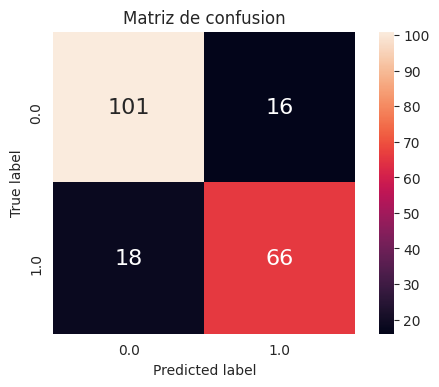

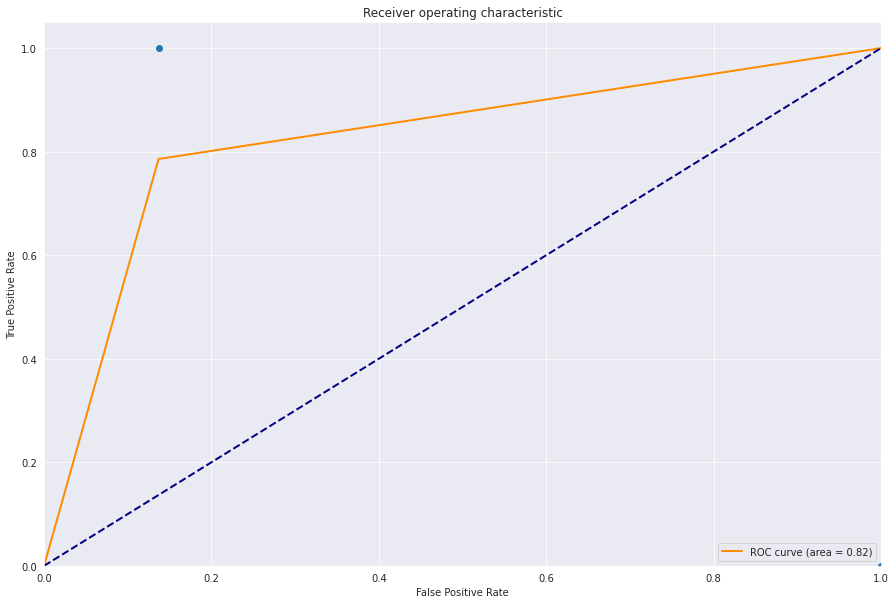

In [4]:
# Separate test and train data
X_train, X_test, y_train, y_test = train_test_split(df_ridge.drop('volveria', 1), df_ridge['volveria'])

# Ridge
parameters = {'alpha': np.linspace(0.1, 15, 149)}
gscv = GridSearchCV(RidgeClassifier(), parameters, scoring='roc_auc')

gscv.fit(X_train, y_train)
print(gscv.best_params_)

preprocessing.report(gscv, X_train, y_train, X_test, y_test)